In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import metrics
import catboost as cb
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer

from mlxtend.preprocessing import minmax_scaling
# for Box-Cox Transformation
from scipy import stats
import xgboost as xgb
from sklearn.metrics import roc_auc_score

from sklearn import preprocessing
import lightgbm as lgbm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import warnings 

from sklearn import linear_model
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('/kaggle/input/financialresilience1234/Train.csv')
submission = pd.read_csv('/kaggle/input/financialresilience1234/SampleSubmission.csv')
test = pd.read_csv('/kaggle/input/financialresilience1234/Test.csv')
variable = pd.read_csv('/kaggle/input/financialresilience1234/VariableDefinitions.csv')

In [5]:
q = ['Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10a', 'Q10b', 'Q11', 'Q12', 'Q13a',
       'Q14', 'Q15', 'Q16', 'Q17a', 'Q17b', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28','target']

dq = df[q]

In [6]:
dq = dq.loc[dq.Q1.isin([2,1])].loc[dq.Q6.isin([2,1])].\
loc[dq.Q10a.isin([2,1])].loc[dq.Q10b.isin([2,1])].\
loc[dq.Q11.isin([2,1])].loc[dq.Q12.isin([2,1])].\
loc[dq.Q13a.isin([2,1])].loc[dq.Q14.isin([2,1])].\
loc[dq.Q15.isin([2,1])].loc[dq.Q16.isin([2,1])].\
loc[dq.Q17a.isin([2,1])].loc[dq.Q17b.isin([2,1])].\
loc[dq.Q21.isin([2,1])].loc[dq.Q22.isin([2,1])].\
loc[dq.Q24.isin([2,1])].loc[dq.Q25.isin([2,1])]

In [73]:
cols_with_missing = [col for col in dq.columns
                     if dq[col].isnull().any()]

cols_with_n_missing = [col for col in dq.columns
                     if not dq[col].isnull().any()]

missing_columns = cols_with_missing

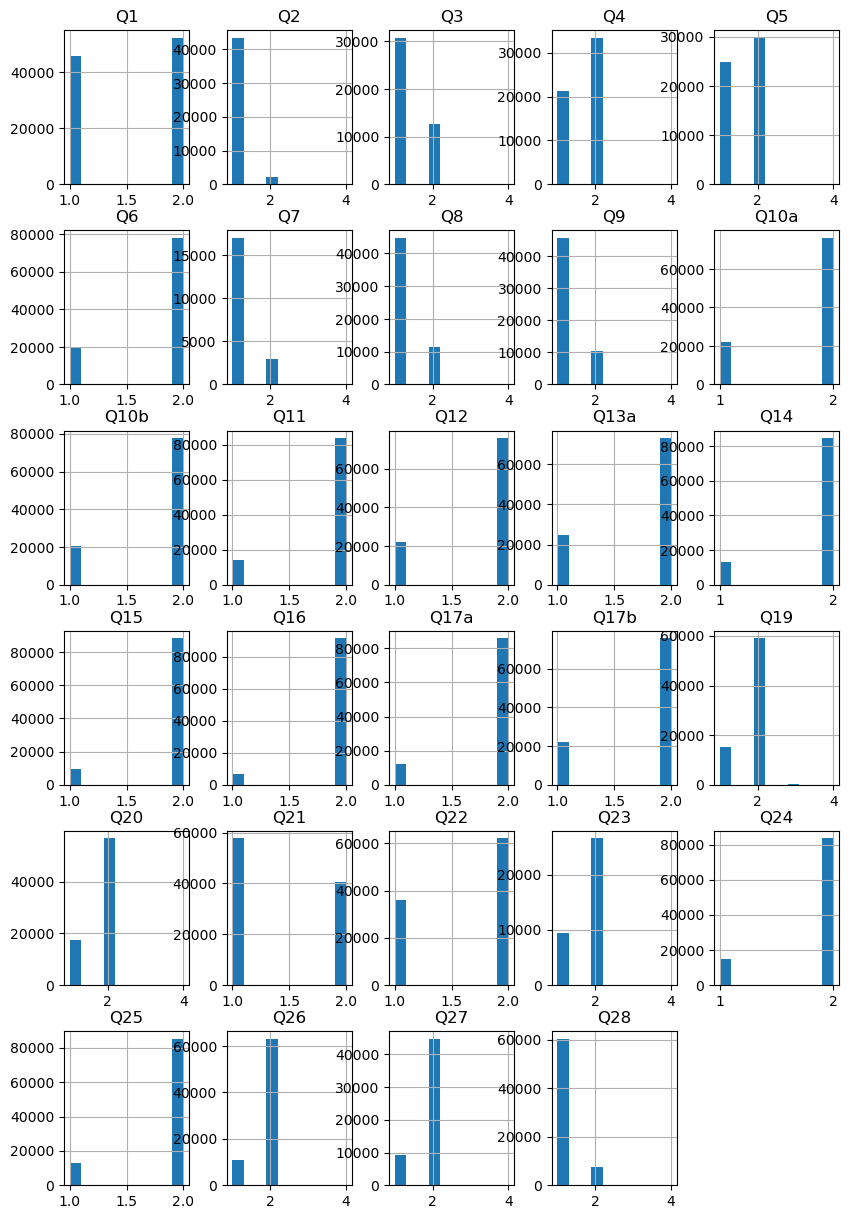

In [63]:
fig,axis = plt.subplots(figsize=(10,15))
dq.hist(ax=axis);

In [87]:
dq[cols_with_missing].columns,dq[cols_with_n_missing].columns

(Index(['Q2', 'Q3', 'Q4', 'Q5', 'Q7', 'Q8', 'Q9', 'Q19', 'Q20', 'Q23', 'Q26',
        'Q27', 'Q28'],
       dtype='object'),
 Index(['Q1', 'Q6', 'Q10a', 'Q10b', 'Q11', 'Q12', 'Q13a', 'Q14', 'Q15', 'Q16',
        'Q17a', 'Q17b', 'Q21', 'Q22', 'Q24', 'Q25'],
       dtype='object'))

In [97]:
cols_with_n_missing.remove('Q2')

In [98]:
dq[cols_with_n_missing]

,Q1,Q6,Q10a,Q10b,Q11,Q12,Q13a,Q14,Q15,Q16,Q17a,Q17b,Q21,Q22,Q24,Q25,Q1
0,2,2,2,2,2,2,2,2,1,2,2,1,1,2,1,2,2
1,2,2,2,2,2,2,1,2,2,2,1,2,1,2,2,2,2
2,1,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,1
3,1,2,1,1,2,1,1,2,2,2,1,2,1,1,1,2,1
4,2,2,1,2,2,2,2,2,2,2,2,2,1,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104862,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
104863,1,2,1,1,2,2,1,2,2,2,2,2,2,1,1,2,1
104864,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
104865,2,2,2,2,1,1,2,2,2,2,2,2,1,2,2,2,2


In [119]:
dy = pd.DataFrame()
for i in cols_with_missing:
    dy['IsMissing'+i]= dq[i].isna()

In [122]:
dy.pop('IsMissingQ7')
dy.pop('IsMissingQ23')

0          True
1          True
2         False
3         False
4          True
          ...  
104862     True
104863    False
104864     True
104865     True
104866    False
Name: IsMissingQ23, Length: 98141, dtype: bool

In [124]:
len(dy),len(dq)

(98141, 98141)

In [125]:
df2 = pd.concat([dq,dy],axis=1)

In [127]:
df2.pop('Q7')
df2.pop('Q23')

0         NaN
1         NaN
2         2.0
3         2.0
4         NaN
         ... 
104862    NaN
104863    2.0
104864    NaN
104865    NaN
104866    2.0
Name: Q23, Length: 98141, dtype: float64

In [138]:
df_col = df2.dropna(axis=1)
df_row = df2.dropna(axis=0)

In [141]:
df_col

,Q1,Q6,Q10a,Q10b,Q11,Q12,Q13a,Q14,Q15,Q16,...,IsMissingQ3,IsMissingQ4,IsMissingQ5,IsMissingQ8,IsMissingQ9,IsMissingQ19,IsMissingQ20,IsMissingQ26,IsMissingQ27,IsMissingQ28
0,2,2,2,2,2,2,2,2,1,2,...,True,True,True,True,True,False,False,False,False,False
1,2,2,2,2,2,2,1,2,2,2,...,True,False,False,False,False,False,False,False,False,False
2,1,2,2,2,2,2,2,2,2,2,...,False,False,False,False,False,False,False,False,True,False
3,1,2,1,1,2,1,1,2,2,2,...,False,False,False,False,False,True,True,True,True,True
4,2,2,1,2,2,2,2,2,2,2,...,True,True,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104862,2,2,2,2,2,2,2,2,2,2,...,True,True,True,True,True,False,False,False,False,False
104863,1,2,1,1,2,2,1,2,2,2,...,False,False,False,False,False,True,True,True,True,True
104864,1,2,2,2,2,2,2,2,2,2,...,False,False,False,False,False,True,True,True,False,True
104865,2,2,2,2,1,1,2,2,2,2,...,True,True,True,True,True,True,True,True,False,True


In [134]:
df = df.loc[df.Q1.isin([2,1])].loc[df.Q6.isin([2,1])].\
loc[df.Q10a.isin([2,1])].loc[df.Q10b.isin([2,1])].\
loc[df.Q11.isin([2,1])].loc[df.Q12.isin([2,1])].\
loc[df.Q13a.isin([2,1])].loc[df.Q14.isin([2,1])].\
loc[df.Q15.isin([2,1])].loc[df.Q16.isin([2,1])].\
loc[df.Q17a.isin([2,1])].loc[df.Q17b.isin([2,1])].\
loc[df.Q21.isin([2,1])].loc[df.Q22.isin([2,1])].\
loc[df.Q24.isin([2,1])].loc[df.Q25.isin([2,1])]

In [143]:
df_col[['country','region','population','age']]= df[['country','region','population','age']]

In [145]:
df_col.isna().sum()

Q1                0
Q6                0
Q10a              0
Q10b              0
Q11               0
Q12               0
Q13a              0
Q14               0
Q15               0
Q16               0
Q17a              0
Q17b              0
Q21               0
Q22               0
Q24               0
Q25               0
IsMissingQ2       0
IsMissingQ3       0
IsMissingQ4       0
IsMissingQ5       0
IsMissingQ8       0
IsMissingQ9       0
IsMissingQ19      0
IsMissingQ20      0
IsMissingQ26      0
IsMissingQ27      0
IsMissingQ28      0
country           0
region          671
population        0
age             236
dtype: int64

In [146]:
df_col.dropna(axis=0)

,Q1,Q6,Q10a,Q10b,Q11,Q12,Q13a,Q14,Q15,Q16,...,IsMissingQ9,IsMissingQ19,IsMissingQ20,IsMissingQ26,IsMissingQ27,IsMissingQ28,country,region,population,age
0,2,2,2,2,2,2,2,2,1,2,...,True,False,False,False,False,False,Morocco,Middle East & North Africa (excluding high inc...,2.555017e+07,66.0
1,2,2,2,2,2,2,1,2,2,2,...,False,False,False,False,False,False,Lebanon,Middle East & North Africa (excluding high inc...,4.591023e+06,44.0
2,1,2,2,2,2,2,2,2,2,2,...,False,False,False,False,True,False,Morocco,Middle East & North Africa (excluding high inc...,2.555017e+07,29.0
3,1,2,1,1,2,1,1,2,2,2,...,False,True,True,True,True,True,Canada,High income: OECD,3.049117e+07,44.0
4,2,2,1,2,2,2,2,2,2,2,...,True,False,False,False,False,False,Mexico,Latin America & Caribbean (excluding high income),9.300232e+07,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104862,2,2,2,2,2,2,2,2,2,2,...,True,False,False,False,False,False,India,South Asia,9.508153e+08,48.0
104863,1,2,1,1,2,2,1,2,2,2,...,False,True,True,True,True,True,"Hong Kong SAR, China",High income: nonOECD,6.522989e+06,16.0
104864,1,2,2,2,2,2,2,2,2,2,...,False,True,True,True,False,True,Mauritius,Sub-Saharan Africa (excluding high income),1.024565e+06,53.0
104865,2,2,2,2,1,1,2,2,2,2,...,True,True,True,True,False,True,Germany,High income: OECD,7.184693e+07,50.0


In [87]:
def preprocess(data, test=False):
    q = ['Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10a', 'Q10b', 'Q11', 'Q12', 'Q13a',
       'Q14', 'Q15', 'Q16', 'Q17a', 'Q17b', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28']

    if test:
        g = ['Q1', 'Q2', 'Q3', 'Q4',
           'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10a', 'Q10b', 'Q11', 'Q12', 'Q13a',
           'Q14', 'Q15', 'Q16', 'Q17a', 'Q17b', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
           'Q24', 'Q25', 'Q26', 'Q27', 'Q28','country','region','population','age']
    else:
        g = ['Q1', 'Q2', 'Q3', 'Q4',
           'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10a', 'Q10b', 'Q11', 'Q12', 'Q13a',
           'Q14', 'Q15', 'Q16', 'Q17a', 'Q17b', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
           'Q24', 'Q25', 'Q26', 'Q27', 'Q28','country','region','population','age','target']
    dg = data[g]
    dq = data[q]
    
    dq = dq.loc[dq.Q1.isin([2,1])].loc[dq.Q6.isin([2,1])].\
    loc[dq.Q10a.isin([2,1])].loc[dq.Q10b.isin([2,1])].\
    loc[dq.Q11.isin([2,1])].loc[dq.Q12.isin([2,1])].\
    loc[dq.Q13a.isin([2,1])].loc[dq.Q14.isin([2,1])].\
    loc[dq.Q15.isin([2,1])].loc[dq.Q16.isin([2,1])].\
    loc[dq.Q17a.isin([2,1])].loc[dq.Q17b.isin([2,1])].\
    loc[dq.Q21.isin([2,1])].loc[dq.Q22.isin([2,1])].\
    loc[dq.Q24.isin([2,1])].loc[dq.Q25.isin([2,1])]
    
    dg = dg.loc[dg.Q1.isin([2,1])].loc[dg.Q6.isin([2,1])].\
    loc[dg.Q10a.isin([2,1])].loc[dg.Q10b.isin([2,1])].\
    loc[dg.Q11.isin([2,1])].loc[dg.Q12.isin([2,1])].\
    loc[dg.Q13a.isin([2,1])].loc[dg.Q14.isin([2,1])].\
    loc[dg.Q15.isin([2,1])].loc[dg.Q16.isin([2,1])].\
    loc[dg.Q17a.isin([2,1])].loc[dg.Q17b.isin([2,1])].\
    loc[dg.Q21.isin([2,1])].loc[dg.Q22.isin([2,1])].\
    loc[dg.Q24.isin([2,1])].loc[dg.Q25.isin([2,1])]
    
    cols_with_missing = [col for col in dq.columns if dq[col].isnull().any()]
    cols_with_n_missing = [col for col in dq.columns if not dq[col].isnull().any()]
    
    dy = pd.DataFrame()
    for i in cols_with_missing:
        dy['IsMissing'+i]= dq[i].isna()
    
    dy.pop('IsMissingQ7')
    dy.pop('IsMissingQ23')
    
    colmiss = ['IsMissingQ2','IsMissingQ3', 'IsMissingQ4', 'IsMissingQ5', 'IsMissingQ8',\
       'IsMissingQ9', 'IsMissingQ19', 'IsMissingQ20', 'IsMissingQ26',\
       'IsMissingQ27','IsMissingQ28']
        
    for i in colmiss:
        le = preprocessing.LabelEncoder()
        le.fit(dy[i])
        dy[i] = le.transform(dy[i])
    
    df2 = pd.concat([dq,dy],axis=1)
    
    df_col = df2.dropna(axis=1)
#     df_row = df2.dropna(axis=0)
    if test:
        df_col[['country','region','population','age']]= dg[['country','region','population','age']]
    else:
        df_col[['country','region','population','age','target']]= dg[['country','region','population','age','target']]
#     df_row[['country','region','population','age']]= df[['country','region','population','age']]


    df_col.age = df_col.age.fillna(df_col['age'].mean())
    df_col.region = df_col.region.fillna('East Asia & Pacific (excluding high income)')
    
    le = preprocessing.LabelEncoder()
    le.fit(df_col.country)
    df_col.country = le.transform(df_col.country)

    le.fit(df_col['region'])
    df_col.region = le.transform(df_col.region)

    return df_col


In [88]:
train = preprocess(df.copy(),False)

In [89]:
test = preprocess(test.copy(),test=True)

KeyError: "['Q2', 'Q3', 'Q4', 'Q5', 'Q7', 'Q8', 'Q9', 'Q19', 'Q20', 'Q23', 'Q26', 'Q27', 'Q28'] not in index"

In [90]:
test.columns

Index(['Q1', 'Q6', 'Q10a', 'Q10b', 'Q11', 'Q12', 'Q13a', 'Q14', 'Q15', 'Q16',
       'Q17a', 'Q17b', 'Q21', 'Q22', 'Q24', 'Q25', 'IsMissingQ2',
       'IsMissingQ3', 'IsMissingQ4', 'IsMissingQ5', 'IsMissingQ8',
       'IsMissingQ9', 'IsMissingQ19', 'IsMissingQ20', 'IsMissingQ26',
       'IsMissingQ27', 'IsMissingQ28', 'country', 'region', 'population',
       'age'],
      dtype='object')

In [91]:
train.age.isna().sum()

0

In [92]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [93]:
from sklearn.metrics import accuracy_score

In [94]:
from sklearn.model_selection import train_test_split

X = train.drop(['target'],axis=1)
y = train.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [112]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': [400,200,100,500,900],
        'seed': 42
    }

In [113]:
def objective(space):
    clf=xgb.XGBClassifier(
                    tree_method='gpu_hist',
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_9bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [114]:
train.pop('population')

KeyError: 'population'

In [115]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,trials = trials)

[21:40:16] WARNING: ../src/learner.cc:627:             
Parameters: { "colsample_9bytree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]


TypeError: 'tuple' object cannot be interpreted as an integer

In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98141 entries, 0 to 104866
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Q1            98141 non-null  int64
 1   Q6            98141 non-null  int64
 2   Q10a          98141 non-null  int64
 3   Q10b          98141 non-null  int64
 4   Q11           98141 non-null  int64
 5   Q12           98141 non-null  int64
 6   Q13a          98141 non-null  int64
 7   Q14           98141 non-null  int64
 8   Q15           98141 non-null  int64
 9   Q16           98141 non-null  int64
 10  Q17a          98141 non-null  int64
 11  Q17b          98141 non-null  int64
 12  Q21           98141 non-null  int64
 13  Q22           98141 non-null  int64
 14  Q24           98141 non-null  int64
 15  Q25           98141 non-null  int64
 16  IsMissingQ2   98141 non-null  int64
 17  IsMissingQ3   98141 non-null  int64
 18  IsMissingQ4   98141 non-null  int64
 19  IsMissingQ5   98141 non-

In [62]:
nu = train.age.to_numpy()

In [67]:
pd.to_numeric(train.age)

ValueError: Unable to parse string "mode" at position 631